<a href="https://colab.research.google.com/github/Schwarzam/NN-SPLUS/blob/master/IC/Mergers_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import keras

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

from keras.preprocessing.image import ImageDataGenerator
from keras import layers, models
from keras.models import load_model
import random 

import os
from os import listdir
from os.path import isfile, join
from PIL import Image

import cv2
from skimage.io import imread
from sklearn.utils import class_weight

import matplotlib.pyplot as plt

In [ ]:
IC_folder = '/content/drive/My Drive/IC'
## 

dataset_dir = os.path.join(IC_folder, 'ndataset')

In [ ]:
img_rows = 128 ## Comprimento imagem
img_cols = 128 ## Largura 
channels = 3 ## 3 porque eh colorida (3 bandas)_

def ler_imagens(file_paths, img_rows = img_rows, img_cols = img_cols, channels = channels):
  images = []
  for file_path in file_paths:
    im = np.asarray(Image.open(file_path).convert('RGB'))
    images.append(im)

  images = np.asarray(images, dtype=np.float32)
  images = images / 255.0 #np.max(images) # normalizar
  return images
  
def get_metadata():
  label = []
  file_paths = []

  #Pegar pastas dentro de ./camera
  for folder in os.listdir(f'{dataset_dir}/'):
      if folder == "assi":
        print("continue")
        continue
      if os.path.isdir(f'{dataset_dir}/' + folder):
          ## Pegar todos arquivos da pasta
          for root, dirs, files in os.walk(os.path.abspath(f"{dataset_dir}/" + folder)):
              for file in files:
                  file_paths.append(os.path.join(root, file))
                  label.append(str(folder))
  
  return label, file_paths

In [ ]:
label, files = get_metadata()
images = ler_imagens(files)

nlabel = []
for i in label:
  if i == "rest":
    nlabel.append(0)
  else:
    nlabel.append(1)

continue


In [ ]:
label = np.asarray(nlabel)

(unique, counts) = np.unique(label, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[   0 1501]
 [   1  535]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, label, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.2)

In [ ]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(label),
                                                 label)

class_weights = dict(enumerate(class_weights))

In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(128, 128, 3))

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
model = models.Sequential()

model.add(conv_base)

# model.add(layers.Conv2D(512, (3, 3), activation='relu', input_shape=(128, 128, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(256, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(256, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
from tensorflow.keras.utils import plot_model

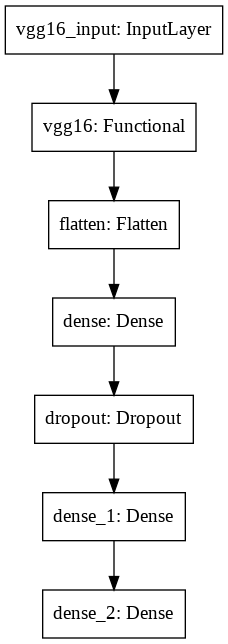

In [ ]:
plot_model(model)

In [ ]:
from tensorflow.keras import optimizers

sgd = optimizers.SGD(learning_rate=1e-4, decay=1e-5, momentum=0.9, nesterov=True)

model.compile(loss = 'binary_crossentropy', 
              optimizer=sgd,
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
          epochs=15,
          validation_data=(X_test, y_test),
          verbose=1, 
          class_weight=class_weights)

Epoch 1/15
51/51 [==============================] - 22s 414ms/step - loss: 0.4472 - accuracy: 0.8704 - val_loss: 0.2639 - val_accuracy: 0.9202
Epoch 2/15
51/51 [==============================] - 15s 297ms/step - loss: 0.2491 - accuracy: 0.9398 - val_loss: 0.3010 - val_accuracy: 0.9080
Epoch 3/15
51/51 [==============================] - 15s 297ms/step - loss: 0.2272 - accuracy: 0.9398 - val_loss: 0.3253 - val_accuracy: 0.9018
Epoch 4/15
51/51 [==============================] - 15s 298ms/step - loss: 0.2320 - accuracy: 0.9410 - val_loss: 0.3133 - val_accuracy: 0.9018
Epoch 5/15
51/51 [==============================] - 15s 297ms/step - loss: 0.2053 - accuracy: 0.9392 - val_loss: 0.2917 - val_accuracy: 0.9110
Epoch 6/15
51/51 [==============================] - 15s 297ms/step - loss: 0.1762 - accuracy: 0.9502 - val_loss: 0.2763 - val_accuracy: 0.9172
Epoch 7/15
51/51 [==============================] - 15s 297ms/step - loss: 0.1725 - accuracy: 0.9509 - val_loss: 0.2822 - val_accuracy: 0.9141

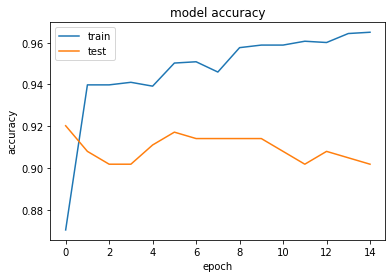

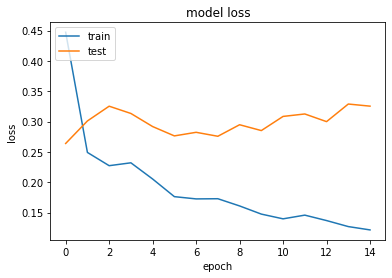

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_val, y_val)

3/3 [==============================] - 0s 95ms/step - loss: 0.0721 - accuracy: 0.9756


[0.0721157044172287, 0.9756097793579102]

In [ ]:
model.evaluate(X_val, y_val)

3/3 [==============================] - 0s 89ms/step - loss: 0.0721 - accuracy: 0.9756


[0.0721157044172287, 0.9756097793579102]

In [ ]:
pred = model.predict(X_val)

In [ ]:
model.save(os.path.join(IC_folder, 'modelTradicional.h5'))

In [ ]:
def plot_figs(arr):
  fig, axs = plt.subplots(4,4, figsize=(12, 12), facecolor='w', edgecolor='k')
  fig.subplots_adjust(hspace = .5, wspace=.001)

  axs = axs.ravel()
  for key, value in enumerate(arr):
    if key > 15:
      break

    try:
      axs[key].imshow(arr[key])
      #axs[key].set_title(f'{Label_y_pred[value]}, {Y_pred[value]}' )
      axs[key].plot()

      axs[key].set_yticklabels([])
      axs[key].set_xticklabels([])
    except:
      pass

In [ ]:
ind = np.where(pred > 0.5)[0]

In [ ]:
pip install splusdata

     |████████████████████████████████| 4.4 MB 6.7 MB/s 
     |████████████████████████████████| 802 kB 54.0 MB/s 
     |████████████████████████████████| 54 kB 2.3 MB/s 
     |████████████████████████████████| 3.0 MB 34.4 MB/s 
  Created wheel for mimeparse: filename=mimeparse-0.1.3-py3-none-any.whl size=3864 sha256=8c132917db39aa29d0575acea087857e8c90aa09e14f380b26a0d23779563555
  Stored in directory: /root/.cache/pip/wheels/49/b4/2d/0081759ae1833bd694024801f7aacddcda8a687e8d5fbaeebd
Successfully built mimeparse


In [ ]:
import splusdata
import pandas as pd
conn = splusdata.connect('###splus.cloud login', '####splus.cloud passowrd')

You have access to internal data


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Schwarzam/Data-analyse---SPLUS-objs/master/DR2_list_fields_reference.cat', delim_whitespace=True)

### Loop to get all galaxies with r_auto < 16.5 on splusdata and predict



In [ ]:
for field in df['field']:
  res = conn.query(f"""SELECT top 1000 stg.id, stg.ra, stg.dec 
                    FROM idr3_vacs.star_galaxy_quasar AS stg JOIN idr3.r_band AS r on stg.id = r.id
                    WHERE class = 2 and prob_gal > 0.8 AND r.r_auto < 16.5 and r.field = '{field}'""")
  
  nim = []
  for i in res:
    try:
      im = conn.get_img(i['RA'], i['DEC'], 128)
      im = im.convert('RGB')
      im = np.asarray(im)
      im = im / 255.0

      im = im.reshape(128, 128, 3)
      nim.append(im)

    except Exception as e:
      print(e)
      nim.append(np.zeros((128, 128, 3)))
      continue



  nim = np.asarray(nim)
  prds = model.predict(nim)

  ind = np.where(prds > 0.7)[0]
  res[ind].write(os.path.join(IC_folder, f'predict/catalogs/{field}.csv'), format='csv')
  selected_res = res[ind]

  for key, value in enumerate(nim[ind]):
    h = Image.fromarray((nim[ind][key] * 255).astype('uint8'))
    h.save(os.path.join(IC_folder, f"predict/images/{selected_res[key]['ID']}.png"))

In [ ]:
cats = os.listdir(os.path.join(IC_folder, 'predict/catalogs'))

In [ ]:
ndf = pd.DataFrame()
for i in cats:
  df = pd.read_csv(os.path.join(IC_folder, 'predict/catalogs', i))
  ndf = ndf.append(df)

In [ ]:
ndf.to_csv(os.path.join(IC_folder, 'predicted.csv'))

In [ ]:
imas = os.listdir(os.path.join(IC_folder, 'ndataset/mergers'))

assi = os.listdir(os.path.join(IC_folder, 'ndataset/assi'))

In [ ]:
file = open(os.path.join(IC_folder, 'trainSet.csv'), 'w')

file.write('RA DEC \n')
for i in imas:
  i = i.replace('.png', '')

  RA = i.split('_')[0]
  DEC = i.split('_')[1]
  file.write(f'{RA} {DEC}\n')

file.close()

In [ ]:
df = pd.read_csv(os.path.join(IC_folder, 'trainSet.csv'), delim_whitespace=True)

In [ ]:
df.to_csv(os.path.join(IC_folder, 'trainSet.csv'))

In [ ]:
conn.query("""SELECT det.id, det.ra, det.dec 
              FROM TAP_UPLOAD.upload AS tap JOIN idr3.detection_image 
              AS det ON 1 = CONTAINS(POINT('', det.ra, det.dec), 
              CIRCLE('', tap.ra, tap.dec, 1. / 3600))""", df)